In [1]:
import sys
# sys.path.append(r'C:\Users\Sommer Lab\Documents\Analysis Code')
import os
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
from scipy.integrate import simpson

# from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [3]:
df = pd.read_csv(r'Z:\ats317group\Data\2023\09-2023\29 Sep 2023\Data Folder 5-9.csv')

In [4]:
dfwait30 = df[df.wait==30]

In [103]:
dataFrame = dfwait30
iterateVariableName = 'VerticalBiasCurrent'
xVariable = 'Ycenter'
yVariable = 'AtomNumber'
groupby = None

iterateVariable = dataFrame[iterateVariableName]
iterateVariable = iterateVariable.unique()

[Text(0.5, 0, 'Ycenter'), Text(0, 0.5, 'AtomNumber')]

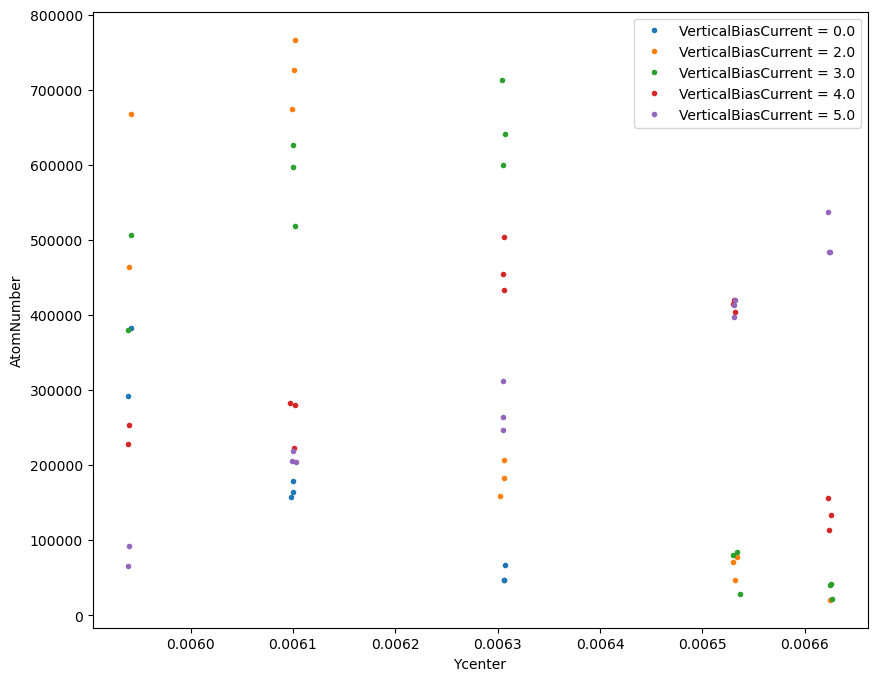

In [105]:
fig, ax = plt.subplots(figsize=(10,8))

for ii in (iterateVariable):
        
    if groupby:
        dfSelect = dfwait30[ (dfwait30.VerticalBiasCurrent==ii) & (dfwait30.Ywidth < 0.00006) ][[xVariable, yVariable, groupby]]
        dfmean = dfSelect.groupby(groupby).mean()
        dfstd = dfSelect.groupby(groupby).std()
        plt.errorbar( dfmean[xVariable], dfmean[yVariable], 
                     dfstd[yVariable], dfstd[xVariable], capsize=3, 
                     label = '{} = {}'.format(iterateVariableName, ii))
    else:
        dfSelect = dfwait30[ (dfwait30.VerticalBiasCurrent==ii) & (dfwait30.Ywidth < 0.00006) ][[xVariable, yVariable]]
        plt.plot( dfSelect[xVariable], dfSelect[yVariable], '.', label = '{} = {}'.format(iterateVariableName, ii))
    
plt.legend()
ax.set(xlabel=xVariable, ylabel=yVariable)

[Text(0.5, 0, 'Ycenter'), Text(0, 0.5, 'AtomNumber')]

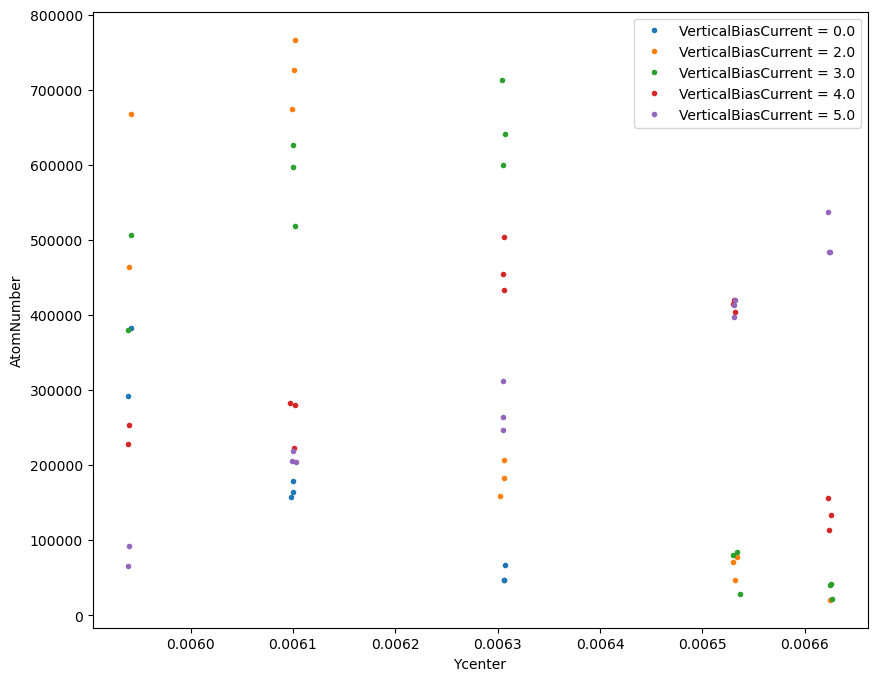

In [91]:
fig, ax = plt.subplots(figsize=(10,8))

for ii in (iterateVariable):
    dfSelect = dfwait30[ (dfwait30.VerticalBiasCurrent==ii) & (dfwait30.Ywidth < 0.00006) ][[xVariable, yVariable]]
    plt.plot( dfSelect[xVariable], dfSelect[yVariable], '.', label = '{} = {}'.format(iterateVariableName, ii))
plt.legend()
ax.set(xlabel=xVariable, ylabel=yVariable)

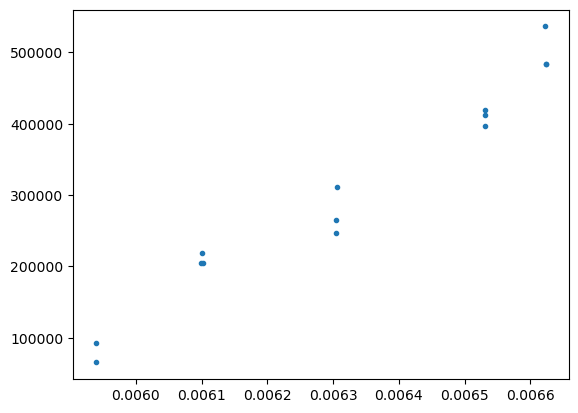

In [72]:
plt.plot( dfSelect[xVariable], dfSelect[yVariable], '.', label = '{} = {}'.format(iterateVariableName, ii))

In [73]:
dfSelect[yVariable]

10      92345.898805
20      65327.219065
30     219109.110571
40     204328.116345
50     205150.656561
60     311988.081724
70     264573.805492
80     247110.962632
90     419461.741262
100    412799.092820
110    397541.356929
120    484463.961675
130    483184.929170
140    536479.258102
Name: AtomNumber, dtype: float64

In [83]:
subdf = dfSelect[[xVariable, yVariable, 'ODT_Position']]
subdf

,Ycenter,AtomNumber,ODT_Position
10,0.005940,92345.898805,5.0
20,0.005939,65327.219065,5.0
30,0.006100,219109.110571,6.0
40,0.006103,204328.116345,6.0
50,0.006099,205150.656561,6.0
60,0.006306,311988.081724,7.0
70,0.006305,264573.805492,7.0
80,0.006305,247110.962632,7.0
90,0.006531,419461.741262,8.0
100,0.006531,412799.092820,8.0


In [87]:
subdf.groupby('ODT_Position').std()

,Ycenter,AtomNumber
ODT_Position,,
5.0,1.018310e-06,19105.091663
6.0,2.083133e-06,8306.551642
7.0,4.449254e-07,33571.081437
8.0,3.473884e-07,11237.531150
9.0,7.694071e-07,30406.996132


In [84]:
subdf.set_index('ODT_Position')

,Ycenter,AtomNumber
ODT_Position,,
5.0,0.005940,92345.898805
5.0,0.005939,65327.219065
6.0,0.006100,219109.110571
6.0,0.006103,204328.116345
6.0,0.006099,205150.656561
7.0,0.006306,311988.081724
7.0,0.006305,264573.805492
7.0,0.006305,247110.962632
8.0,0.006531,419461.741262


In [109]:
def PlotFromDataCSV(filePath, xVariable, yVariable, 
                    groupby=None, iterateVariable=None, 
                    filterlist=None, filterLogic='and'):

    
    if not os.path.exists(filePath):
        raise FileNotFoundError("The file does not exist!")
    
    df = pd.read_csv(filePath)
    
    if filterlist:
        masklist = []
        for fil in filterlist:
            masklist.append(eval( 'df.' + fil.replace(' ', '_') ))
            
        if len(masklist) > 1:
            for mask in masklist[1:]:
                if filterLogic == 'and':
                    masklist[0] &= mask
                elif filterLogic == 'or':
                    masklist[0] |= mask
        df = df[ masklist[0] ]
    
    columnlist = [xVariable, yVariable]
    
    if iterateVariable:
        iterable = df[iterateVariable].unique()
        columnlist.append(iterateVariable)
    else:
        iterable = [None]
        
    if groupby:
        columnlist.append(groupby)
    
    
    fig, ax = plt.subplots(figsize=(8,5))
    for ii in iterable:
        if ii is None:
            dfii = df[columnlist]
        else:
            dfii = df[columnlist][ (df[iterateVariable]==ii) ]
            
        if groupby:
            dfiimean = dfii.groupby(groupby).mean()
            dfiistd = dfii.groupby(groupby).std()
            plt.errorbar(dfiimean[xVariable], dfiimean[yVariable],
                         dfiistd[yVariable], dfiistd[xVariable], capsize=3,
                         label = '{} = {}'.format(iterateVariableName, ii))
        else:
            plt.plot( dfii[xVariable], dfii[yVariable], '.', 
                     label = '{} = {}'.format(iterateVariable, ii))
    
    ax.set(xlabel=xVariable, ylabel=yVariable)
    fig.tight_layout()
    if iterateVariable:
        plt.legend()
    plt.show()

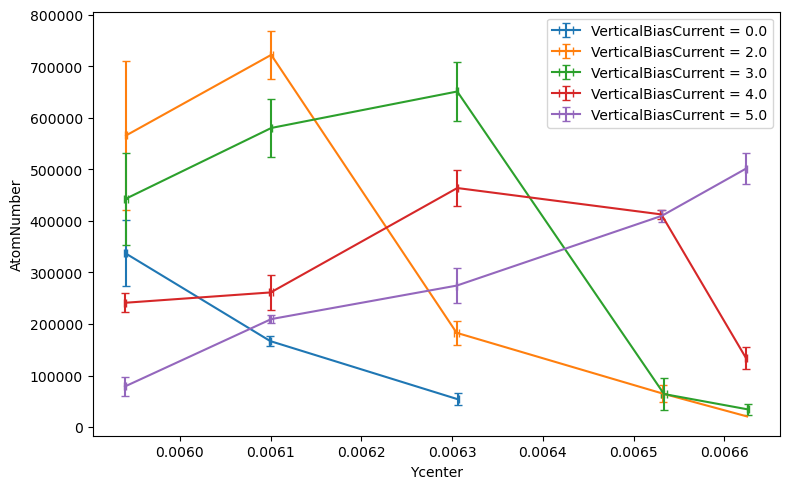

In [111]:
path = 'Z:\\ats317group\\Data\\2023/09-2023/29 Sep 2023\\Data Folder 5-9.csv'
PlotFromDataCSV(path, 'Ycenter', 'AtomNumber', filterlist=['Ywidth<0.00006', 'wait==30'], 
                iterateVariable='VerticalBiasCurrent', groupby='ODT_Position')

[Text(0.5, 0, 'Ycenter'), Text(0, 0.5, 'AtomNumber')]

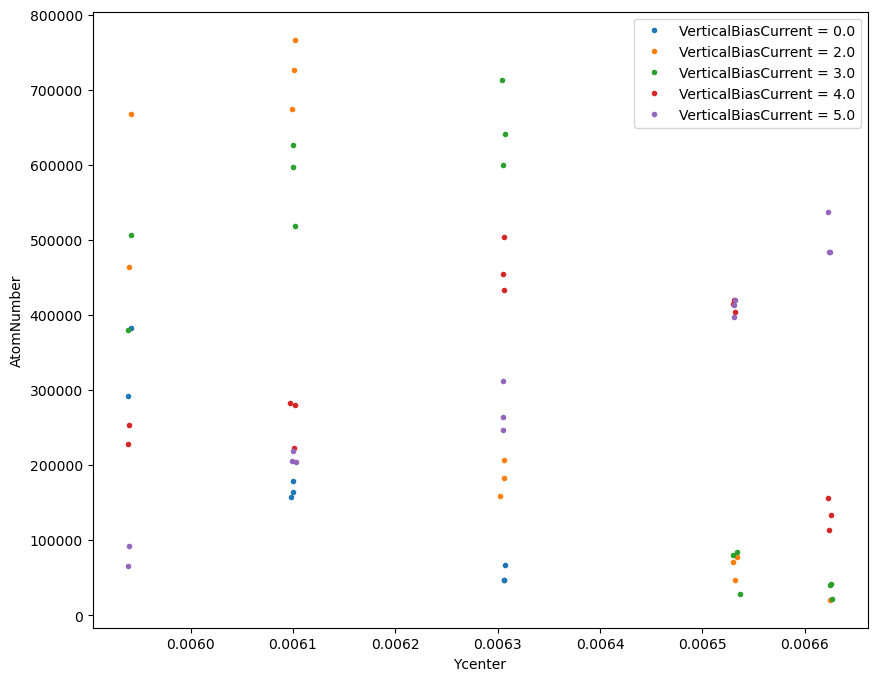

In [105]:
fig, ax = plt.subplots(figsize=(10,8))

for ii in (iterateVariable):
        
    if groupby:
        dfSelect = dfwait30[ (dfwait30.VerticalBiasCurrent==ii) & (dfwait30.Ywidth < 0.00006) ][[xVariable, yVariable, groupby]]
        dfmean = dfSelect.groupby(groupby).mean()
        dfstd = dfSelect.groupby(groupby).std()
        plt.errorbar( dfmean[xVariable], dfmean[yVariable], 
                     dfstd[yVariable], dfstd[xVariable], capsize=3, 
                     label = '{} = {}'.format(iterateVariableName, ii))
    else:
        dfSelect = dfwait30[ (dfwait30.VerticalBiasCurrent==ii) & (dfwait30.Ywidth < 0.00006) ][[xVariable, yVariable]]
        plt.plot( dfSelect[xVariable], dfSelect[yVariable], '.', label = '{} = {}'.format(iterateVariableName, ii))
    
plt.legend()
ax.set(xlabel=xVariable, ylabel=yVariable)

In [108]:
subdf[[xVariable, '']]

KeyError: "[''] not in index"

In [114]:
!python --version

Python 3.10.9
